In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as plt
import numpy as np

In [4]:
trainX = pd.read_csv("train.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)
trainy = trainX.pop("label")
testX = pd.read_csv("test.csv").select_dtypes(exclude=['object']).fillna(method="bfill", axis=0).fillna(0)

input_shape=[trainX.shape[1]]

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=8, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1),
])
model.compile(
    optimizer="adam",
    loss="mae"
)

In [6]:
history = model.fit(
    trainX, trainy,
    validation_data=(trainX, trainy),
    epochs=100)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 6.0046 - val_loss: 1.2561
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2543 - val_loss: 0.9954
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.0269 - val_loss: 0.9169
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.9236 - val_loss: 0.9253
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.8524 - val_loss: 0.7989
Epoch 6/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7887 - val_loss: 0.9511
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7365 - val_loss: 0.6111
Epoch 8/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.7094 - val_loss: 0.5943
Epoch 9/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6655 - val_loss: 0.6719
Epoch 10/100
1313/1313 [==============================] - 2s 2ms/step - l

<AxesSubplot:>

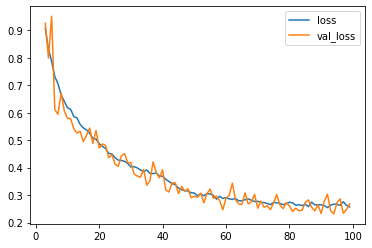

In [7]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[3:, ['loss', 'val_loss']].plot()

In [8]:
prediction = model.predict(testX)
thePrediction = pd.DataFrame(prediction, columns=['label'])